## 基于Apriori算法完成Market Basket分析实验
### --10215501435 杨茜雅

#### 数据：retail.xlsx

#### 1.Import Data & Data Preprocessing

In [1]:
# 第一部分：Import Data & Data Preprocessing
import pandas as pd
import matplotlib.pyplot as plt

# 1. 导入数据
df_1 = pd.read_excel('retail.xlsx', sheet_name='Year 2009-2010')  # 替换为实际的工作表名称
df_2 = pd.read_excel('retail.xlsx', sheet_name='Year 2010-2011')  # 替换为实际的工作表名称
# Print the first few rows of the dataframe
print("Year 2009-2010 dataframe:\n")
print(df_1.head())
print("Number of instances (rows):", df_1.shape[0])
print("Number of attributes (columns):", df_1.shape[1])
print("Column names:", df_1.columns.tolist())
print()

print("Year 2010-2011 dataframe:\n")
print(df_2.head())
print("Number of instances (rows):", df_2.shape[0])
print("Number of attributes (columns):", df_2.shape[1])
print("Column names:", df_2.columns.tolist())
print()

Year 2009-2010 dataframe:

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
Number of instances (rows): 525461
Number of attributes (columns): 8
Column names: ['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']

Year 2

In [2]:
# 2. 查看数据信息，包括每列的缺失值数量
missing_values_1 = df_1.isnull().sum()
missing_values_2 = df_2.isnull().sum()
print("Missing values in sheet1:\n", missing_values_1)
print()
print("Missing values in sheet2:\n", missing_values_2)

Missing values in sheet1:
 Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

Missing values in sheet2:
 Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64


In [3]:
# 3. 删除有缺失值的行
num_rows_before_1 = df_1.shape[0]
num_rows_before_2 = df_2.shape[0]
df_1.dropna(inplace=True)
df_2.dropna(inplace=True)

num_rows_after_1 = df_1.shape[0]
num_rows_after_2 = df_2.shape[0]
print("Year 2009-2010 dataframe:")
print(f"Number of rows before dropping missing values: {num_rows_before_1}")
print(f"Number of rows after dropping missing values: {num_rows_after_1}")

print()
print("Year 2010-2011 dataframe:")
print(f"Number of rows before dropping missing values: {num_rows_before_2}")
print(f"Number of rows after dropping missing values: {num_rows_after_2}")

print()
print("检查一下:")
missing_values_1 = df_1.isnull().sum()
missing_values_2 = df_2.isnull().sum()
print("Missing values in sheet1:\n", missing_values_1)
print()
print("Missing values in sheet2:\n", missing_values_2)
print("目前无缺失值")

Year 2009-2010 dataframe:
Number of rows before dropping missing values: 525461
Number of rows after dropping missing values: 417534

Year 2010-2011 dataframe:
Number of rows before dropping missing values: 541910
Number of rows after dropping missing values: 406830

检查一下:
Missing values in sheet1:
 Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

Missing values in sheet2:
 Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64
目前无缺失值


In [4]:
# 4. 确定并删除已取消的交易

print("Year 2009-2010 dataframe:\n")
num_rows_before_1 = df_1.shape[0]
print(f"Number of rows before dropping cancelled transactions: {num_rows_before_1}")
cancelled_transactions_1 = df_1[df_1['Invoice'].astype(str).str.contains('C', na=False)]
print("Year 2009-2010 Cancelled transactions count:", cancelled_transactions_1.shape[0])
df_1 = df_1[~df_1['Invoice'].astype(str).str.contains('C', na=False)]
num_rows_after_1 = df_1.shape[0]
print(f"Number of rows after dropping cancelled transactions: {num_rows_after_1}")
print()


print("Year 2010-2011 dataframe:\n")
num_rows_before_2 = df_2.shape[0]
print(f"Number of rows before dropping cancelled transactions: {num_rows_before_2}")
cancelled_transactions_1 = df_2[df_2['Invoice'].astype(str).str.contains('C', na=False)]
print("Year 2010-2011 Cancelled transactions count:", cancelled_transactions_1.shape[0])
df_2 = df_2[~df_2['Invoice'].astype(str).str.contains('C', na=False)]
num_rows_after_2 = df_2.shape[0]
print(f"Number of rows after dropping cancelled transactions: {num_rows_after_2}")


Year 2009-2010 dataframe:

Number of rows before dropping cancelled transactions: 417534
Year 2009-2010 Cancelled transactions count: 9839
Number of rows after dropping cancelled transactions: 407695

Year 2010-2011 dataframe:

Number of rows before dropping cancelled transactions: 406830
Year 2010-2011 Cancelled transactions count: 8905
Number of rows after dropping cancelled transactions: 397925


Year 2009-2010 percentiles in Quantity: [  1. 144.]
Number of outliers in Quantity: 3251


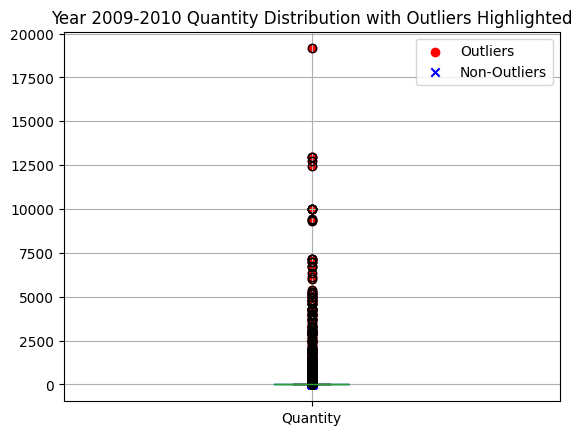

Year 2009-2010 Number of outliers in Quantity after clipping: 0

Year 2009-2010 percentiles in Price: [ 0.29 14.95]
Number of outliers in Price: 6857


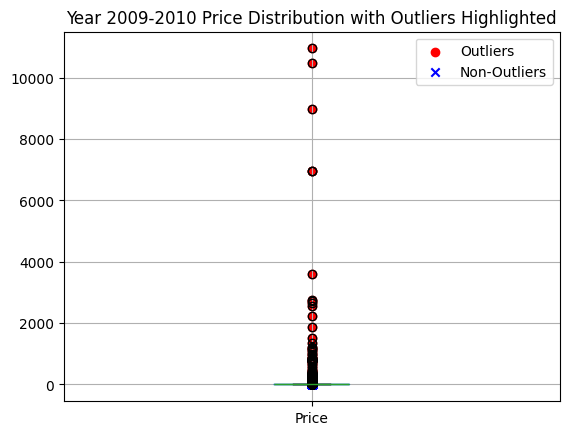

Year 2009-2010 Number of outliers in Price after clipping: 0



In [5]:
# 5. 异常值处理 Year 2009-2010
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

for column in ['Quantity', 'Price']:
    
    # 计算1%和99%的分位数
    percentiles_1 = df_1[column].quantile([0.01, 0.99]).values
    print(f"Year 2009-2010 percentiles in {column}: {percentiles_1}")
    # 标记非异常值
    non_outliers_1 = df_1[(df_1[column] >= percentiles_1[0]) & (df_1[column] <= percentiles_1[1])]
    # 标记异常值
    outliers_1 = df_1[(df_1[column] < percentiles_1[0]) | (df_1[column] > percentiles_1[1])]
    
    # 打印异常值数量
    print(f"Number of outliers in {column}: {outliers_1.shape[0]}")
    
    # 绘制箱线图
    df_1.boxplot(column)
    plt.title(f'Year 2009-2010 {column} Distribution with Outliers Highlighted')
    
    # 在箱线图上叠加异常值点，使用不同的颜色标记异常值
    plt.scatter(np.full_like(outliers_1[column], 1), outliers_1[column], color='red', marker='o', label='Outliers')
    plt.scatter(np.full_like(non_outliers_1[column], 1), non_outliers_1[column], color='blue', marker='x', label='Non-Outliers')
    
    # 添加图例
    plt.legend()
    
    plt.show()
    
    # 裁剪异常值
    df_1[column] = df_1[column].clip(percentiles_1[0], percentiles_1[1])
    
    # 打印异常值数量（裁剪后）- 理论上应该为0，因为数据已被裁剪
    outliers_after_1 = df_1[(df_1[column] < percentiles_1[0]) | (df_1[column] > percentiles_1[1])]
    print(f"Year 2009-2010 Number of outliers in {column} after clipping: {outliers_after_1.shape[0]}")
    print()
   

Year 2010-2011 percentiles in Quantity: [  1. 120.]
Number of outliers in Quantity: 3896


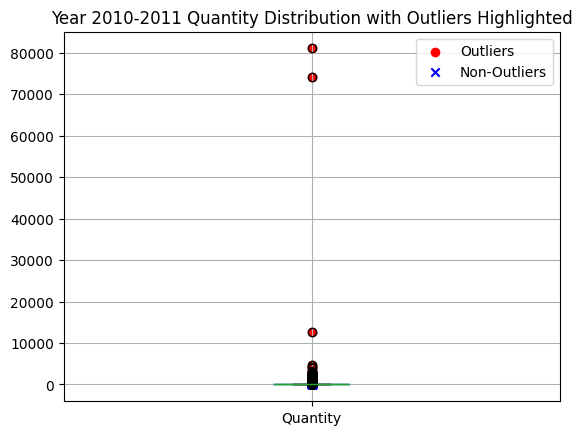

Year 2009-2010 Number of outliers in Quantity after clipping: 0

Year 2010-2011 percentiles in Price: [ 0.21 14.95]
Number of outliers in Price: 6766


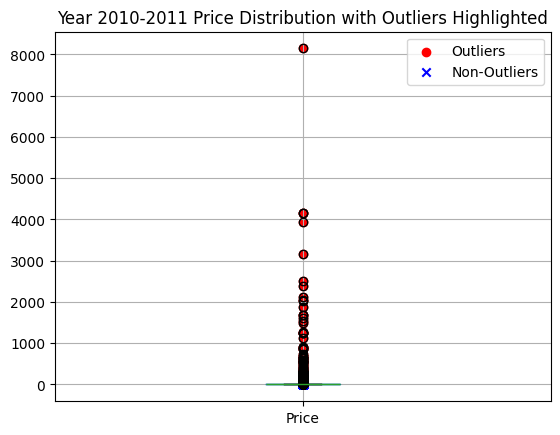

Year 2009-2010 Number of outliers in Price after clipping: 0



In [6]:
# 5. 异常值处理  Year 2010-2011
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

for column in ['Quantity', 'Price']:
    
    # 计算1%和99%的分位数
    percentiles_2 = df_2[column].quantile([0.01, 0.99]).values
    print(f"Year 2010-2011 percentiles in {column}: {percentiles_2}")
    # 标记非异常值
    non_outliers_2 = df_2[(df_2[column] >= percentiles_2[0]) & (df_2[column] <= percentiles_2[1])]
    # 标记异常值
    outliers_2 = df_2[(df_2[column] < percentiles_2[0]) | (df_2[column] > percentiles_2[1])]
    
    # 打印异常值数量
    print(f"Number of outliers in {column}: {outliers_2.shape[0]}")
    
    # 绘制箱线图
    df_2.boxplot(column)
    plt.title(f'Year 2010-2011 {column} Distribution with Outliers Highlighted')
    
    # 在箱线图上叠加异常值点，使用不同的颜色标记异常值
    plt.scatter(np.full_like(outliers_2[column], 1), outliers_2[column], color='red', marker='o', label='Outliers')
    plt.scatter(np.full_like(non_outliers_2[column], 1), non_outliers_2[column], color='blue', marker='x', label='Non-Outliers')
    
    # 添加图例
    plt.legend()
    
    plt.show()
    
    # 裁剪异常值
    df_2[column] = df_2[column].clip(percentiles_2[0], percentiles_2[1])
    
    # 打印异常值数量（裁剪后）- 理论上应该为0，因为数据已被裁剪
    outliers_after_2 = df_2[(df_2[column] < percentiles_2[0]) | (df_2[column] > percentiles_2[1])]
    print(f"Year 2009-2010 Number of outliers in {column} after clipping: {outliers_after_2.shape[0]}")
    print()
   

In [7]:
# 6. 确保StockCode和Description的一一对应性，并删除不符合条件的数据
print("Year 2009-2010 dataframe:\n")
unique_desc_1 = df_1.groupby('StockCode').Description.nunique()
non_unique_stock_codes_1 = unique_desc_1[unique_desc_1 > 1].index.tolist()
non_unique_descriptions_1 = df_1[df_1['StockCode'].isin(non_unique_stock_codes_1)]
num_rows_before_1 = df_1.shape[0]
print("Number of rows before removing non-unique StockCode entries:", num_rows_before_1)
print("Year 2009-2010 Number of rows with non-unique StockCodes:", non_unique_descriptions_1.shape[0])
print("Year 2009-2010 Non-unique StockCodes and their Descriptions:\n", non_unique_descriptions_1)
df_1 = df_1[~df_1['StockCode'].isin(non_unique_stock_codes_1)]
# 打印删除后的数据行数
num_rows_after_1 = df_1.shape[0]
print("Number of rows after removing non-unique StockCode entries:\n", num_rows_after_1)


print()

print("Year 2010-2011 dataframe:\n")
unique_desc_2 = df_2.groupby('StockCode').Description.nunique()
non_unique_stock_codes_2 = unique_desc_2[unique_desc_2 > 1].index.tolist()
non_unique_descriptions_2 = df_2[df_2['StockCode'].isin(non_unique_stock_codes_2)]
num_rows_before_2 = df_2.shape[0]
print("Number of rows before removing non-unique StockCode entries:", num_rows_before_2)
print("Year 2010-2011 Number of rows with non-unique StockCodes:", non_unique_descriptions_2.shape[0])
print("Year 2010-2011 Non-unique StockCodes and their Descriptions:\n", non_unique_descriptions_2)
df_2 = df_2[~df_2['StockCode'].isin(non_unique_stock_codes_2)]
# 打印删除后的数据行数
num_rows_after_2 = df_2.shape[0]
print("Number of rows after removing non-unique StockCode entries:\n", num_rows_after_2)



Year 2009-2010 dataframe:

Number of rows before removing non-unique StockCode entries: 407695
Year 2009-2010 Number of rows with non-unique StockCodes: 87045
Year 2009-2010 Non-unique StockCodes and their Descriptions:
        Invoice StockCode                         Description  Quantity  \
2       489434    79323W                 WHITE CHERRY LIGHTS        12   
7       489434     21523  FANCY FONT HOME SWEET HOME DOORMAT        10   
8       489435     22350                           CAT BOWL         12   
9       489435     22349      DOG BOWL , CHASING BALL DESIGN        12   
10      489435     22195        HEART MEASURING SPOONS LARGE        24   
...        ...       ...                                 ...       ...   
525434  538171     21156           RETROSPOT CHILDRENS APRON         1   
525435  538171    47591D     PINK FAIRY CAKE CHILDRENS APRON         1   
525436  538171    47591B            SCOTTIES CHILDRENS APRON         2   
525437  538171     22899        CHILDRE

In [8]:
# 7. 删除StockCode为'POST'的行
print("Year 2009-2010 dataframe:\n")
num_rows_before_removal_1 = df_1.shape[0]
print(f"Number of rows before removing 'POST' entries: {num_rows_before_removal_1}")
num_post_entries_1 = df_1[df_1['StockCode'] == 'POST'].shape[0]
print(f"Number of rows with 'StockCode' as 'POST' in Year 2009-2010: {num_post_entries_1}")
df_1 = df_1[df_1['StockCode'] != 'POST']
num_rows_after_removal_1 = df_1.shape[0]
print(f"Number of rows after removing 'POST' entries: {num_rows_after_removal_1}")
print()


print("Year 2010-2011 dataframe:\n")
num_rows_before_removal_2 = df_2.shape[0]
print(f"Number of rows before removing 'POST' entries: {num_rows_before_removal_2}")
num_post_entries_2 = df_2[df_2['StockCode'] == 'POST'].shape[0]
print(f"Number of rows with 'StockCode' as 'POST' in Year 2010-2011: {num_post_entries_2}")
df_2 = df_2[df_2['StockCode'] != 'POST']
num_rows_after_removal_2 = df_2.shape[0]
print(f"Number of rows after removing 'POST' entries: {num_rows_after_removal_2}")

Year 2009-2010 dataframe:

Number of rows before removing 'POST' entries: 320650
Number of rows with 'StockCode' as 'POST' in Year 2009-2010: 738
Number of rows after removing 'POST' entries: 319912

Year 2010-2011 dataframe:

Number of rows before removing 'POST' entries: 359331
Number of rows with 'StockCode' as 'POST' in Year 2010-2011: 1100
Number of rows after removing 'POST' entries: 358231


#### 2.Preparing Invoice-Product Matrix for ARL Data Structure

In [9]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings('ignore')


# 假设df_1已经加载并进行了必要的预处理，筛选'Korea'的数据
df_1_Korea = df_1[df_1['Country'] == 'Korea']
print(f"Number of entries in df_1 for Korea: {df_1_Korea.shape[0]}")

# 计算每个产品的总销量并选择销量排名前13的产品
top_products = df_1_Korea.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(13).index

# 根据销量排名前13的产品创建一个发票-产品矩阵
basket = (df_1_Korea[df_1_Korea['Description'].isin(top_products)]
          .groupby(['Invoice', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Invoice'))

# 将数量转换为1或0的函数
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

# 应用encode_units函数到basket
basket_sets = basket.applymap(encode_units)

# 打印basket_sets的实例和属性数量
print(f"Number of instances (rows) in basket_sets: {basket_sets.shape[0]}")
print(f"Number of attributes (columns) in basket_sets: {basket_sets.shape[1]}")

# 打印basket_sets的前几行以验证结果
basket_sets.head()


Number of entries in df_1 for Korea: 49
Number of instances (rows) in basket_sets: 2
Number of attributes (columns) in basket_sets: 13


Description,CACTI T-LIGHT CANDLES,CITRONELLA CANDLE GARDEN POT,DISCO BALL CHRISTMAS DECORATION,FROG CANDLE,HEART T-LIGHT HOLDER,MIRRORED WALL ART POPPIES,MIRRORED WALL ART SKULLS,MIRRORED WALL ART SNOWFLAKES,MIRRORED WALL ART SPLODGES,PACK 3 BOXES CHRISTMAS PANNETONE,ROTATING SILVER ANGELS T-LIGHT HLDR,SET OF 20 VINTAGE CHRISTMAS NAPKINS,TROPICAL HONEYCOMB PAPER GARLAND
Invoice,,,,,,,,,,,,,
522570,0,0,0,1,1,0,0,0,0,0,0,0,0
535831,1,1,1,0,0,1,1,1,1,1,1,1,1


In [10]:
from mlxtend.frequent_patterns import apriori, association_rules
# 使用Apriori算法计算支持度，min_support设置为0.01
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
# 从频繁项集中生成关联规则
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.01)
# 排序并查看支持度最高的前五个关联规则
top_rules = rules.sort_values(by="support", ascending=False).head(5)
print(top_rules)


                                 antecedents  \
173053  (TROPICAL  HONEYCOMB PAPER GARLAND )   
0                    (CACTI T-LIGHT CANDLES)   
1             (CITRONELLA CANDLE GARDEN POT)   
2                    (CACTI T-LIGHT CANDLES)   
3          (DISCO BALL CHRISTMAS DECORATION)   

                                              consequents  antecedent support  \
173053  (PACK 3 BOXES CHRISTMAS PANNETONE, CITRONELLA ...                 0.5   
0                          (CITRONELLA CANDLE GARDEN POT)                 0.5   
1                                 (CACTI T-LIGHT CANDLES)                 0.5   
2                       (DISCO BALL CHRISTMAS DECORATION)                 0.5   
3                                 (CACTI T-LIGHT CANDLES)                 0.5   

        consequent support  support  confidence  lift  leverage  conviction  \
173053                 0.5      0.5         1.0   2.0      0.25         inf   
0                      0.5      0.5         1.0   2.0      0.25   